# **Transactions Data PhonePe**

# **Libraries Used**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Aggregated**

## **Country**

### **Load CSV**

In [2]:
df1 = pd.read_csv("dataset/transaction/aggregated_transaction_country.csv")
df1

,from_date,to_date,transaction_name,count,amount
0,2018-01-01,2018-03-28,Recharge & bill payments,72550406,1.447271e+10
1,2018-01-01,2018-03-28,Peer-to-peer payments,46982705,1.472459e+11
2,2018-01-01,2018-03-28,Merchant payments,5368669,4.656679e+09
3,2018-01-01,2018-03-28,Financial Services,3762820,8.158531e+08
4,2018-01-01,2018-03-28,Others,5761576,4.643217e+09
...,...,...,...,...,...
135,2024-10-01,2024-12-28,Merchant payments,17419191808,8.081430e+12
136,2024-10-01,2024-12-28,Peer-to-peer payments,9368204284,2.663387e+13
137,2024-10-01,2024-12-28,Recharge & bill payments,1392529171,1.255973e+12
138,2024-10-01,2024-12-28,Financial Services,32113340,1.816233e+10


### **Dataset Info**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   from_date         140 non-null    object 
 1   to_date           140 non-null    object 
 2   transaction_name  140 non-null    object 
 3   count             140 non-null    int64  
 4   amount            140 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ KB


* Type Conversion needed for from_date & to_date

In [4]:
df1['from_date'] = pd.to_datetime(df1['from_date'])
df1['to_date'] = pd.to_datetime(df1['to_date'])
df1['year'] = df1['from_date'].dt.year

### **Dataset Describe**

In [5]:
df1.describe()

,from_date,to_date,count,amount,year
count,140,140,1.400000e+02,1.400000e+02,140.000000
mean,2021-05-16 18:51:25.714285824,2021-08-12 14:34:17.142857216,1.680606e+09,2.468027e+12,2021.000000
min,2018-01-01 00:00:00,2018-03-28 00:00:00,1.358171e+06,5.453293e+08,2018.000000
25%,2019-09-08 00:00:00,2019-12-05 06:00:00,8.441506e+06,6.384409e+09,2019.000000
50%,2021-05-16 12:00:00,2021-08-13 00:00:00,2.042444e+08,1.197772e+11,2021.000000
75%,2023-01-23 12:00:00,2023-04-20 00:00:00,1.372036e+09,1.430352e+12,2023.000000
max,2024-10-01 00:00:00,2024-12-28 00:00:00,1.741919e+10,2.663387e+13,2024.000000
std,NaN,NaN,3.302734e+09,5.397846e+12,2.007181


In [6]:
print(f"Total Amounts: {df1['amount'].sum()}")
print(f"Total Counts: {df1['count'].sum()}")
print(f"Amounts per Counts: {df1['amount'].sum()/df1['count'].sum()}")

Total Amounts: 345523780869125.6
Total Counts: 235284904571
Amounts per Counts: 1468.533569967553


### **Plots**

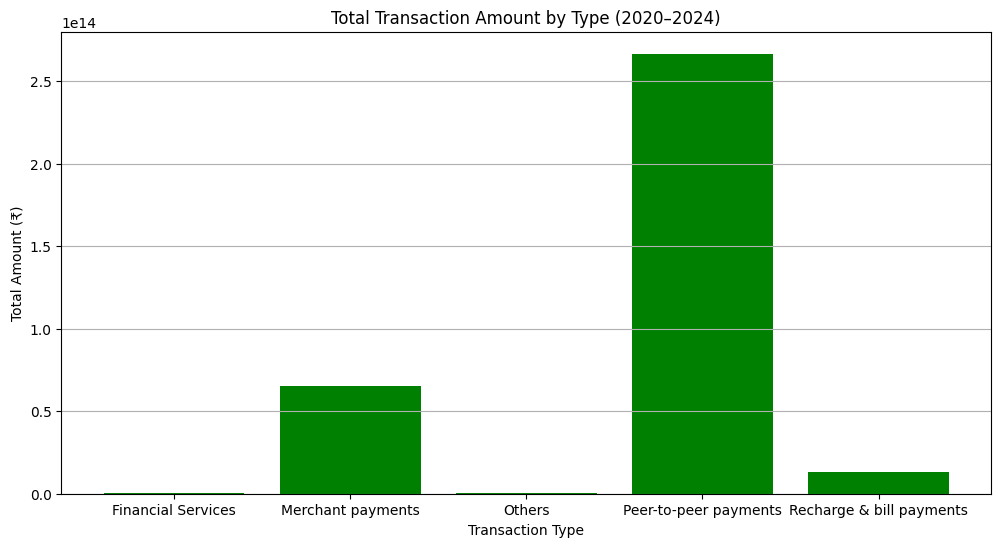

In [7]:
# Highest Transactions Methods by Amount
transaction_total_amount = df1.groupby('transaction_name')['amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(transaction_total_amount['transaction_name'], transaction_total_amount['amount'], color='green')
plt.title("Total Transaction Amount by Type (2020–2024)")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount (₹)")
plt.grid(axis='y')
plt.show()

* Peer-to-peer payments were used for the highest amounts that were transferred.
* Merchant Payment is not even half of the peer-to-peer payments.
* This shows people transfer more money in person than to merchants.

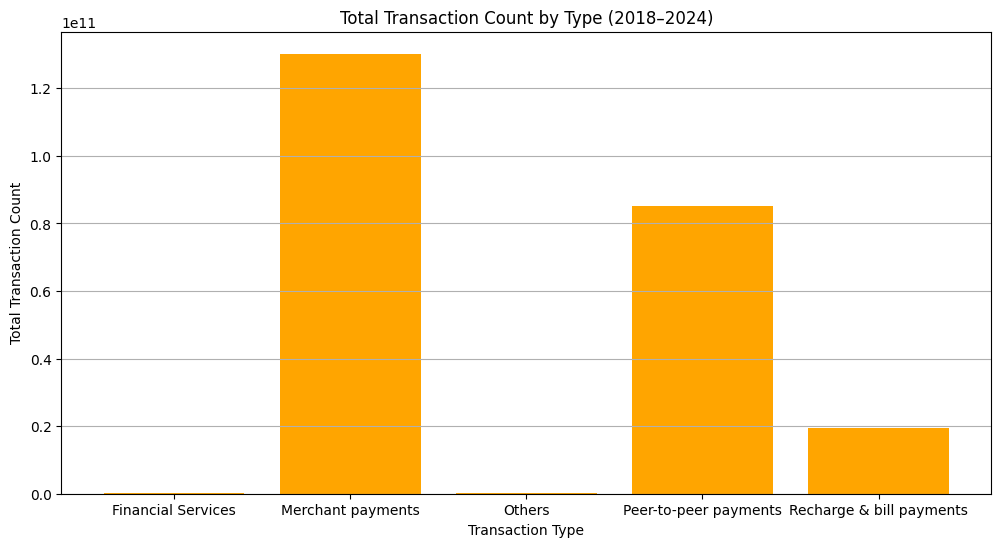

In [8]:
# Highest Transactions Methods by Counts
transaction_total_count = df1.groupby('transaction_name')['count'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(transaction_total_count['transaction_name'], transaction_total_count['count'], color='orange')
plt.title("Total Transaction Count by Type (2018–2024)")
plt.xlabel("Transaction Type")
plt.ylabel("Total Transaction Count")
plt.grid(axis='y')
plt.show()

* Merchant payments count far exceeds that of peer-to-peer payments.
* This means merchant payments are done heavily but only in small amounts compared to peer-to-peer.
* This also shows people started opting for UPI payments.

## **State**

### **Load CSV**

In [9]:
df2 = pd.read_csv("dataset/transaction/aggregated_transaction_state.csv")
df2

,from_date,to_date,transaction_name,count,amount,state
0,2018-01-01,2018-03-28,Recharge & bill payments,4200,1.845307e+06,andaman-&-nicobar-islands
1,2018-01-01,2018-03-28,Peer-to-peer payments,1871,1.213866e+07,andaman-&-nicobar-islands
2,2018-01-01,2018-03-28,Merchant payments,298,4.525072e+05,andaman-&-nicobar-islands
3,2018-01-01,2018-03-28,Financial Services,33,1.060142e+04,andaman-&-nicobar-islands
4,2018-01-01,2018-03-28,Others,256,1.846899e+05,andaman-&-nicobar-islands
...,...,...,...,...,...,...
5029,2024-10-01,2024-12-28,Merchant payments,655100809,3.892862e+11,west-bengal
5030,2024-10-01,2024-12-28,Peer-to-peer payments,493217788,1.361927e+12,west-bengal
5031,2024-10-01,2024-12-28,Recharge & bill payments,76043195,5.753406e+10,west-bengal
5032,2024-10-01,2024-12-28,Financial Services,2352084,8.472965e+08,west-bengal


### **Dataset Info**

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   from_date         5034 non-null   object 
 1   to_date           5034 non-null   object 
 2   transaction_name  5034 non-null   object 
 3   count             5034 non-null   int64  
 4   amount            5034 non-null   float64
 5   state             5034 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 236.1+ KB


* Type Conversion needed for from_date & to_date

In [11]:
df2['from_date'] = pd.to_datetime(df2['from_date'])
df2['to_date'] = pd.to_datetime(df2['to_date'])

### **Dataset Describe**

In [12]:
df2.describe()

,from_date,to_date,count,amount
count,5034,5034,5.034000e+03,5.034000e+03
mean,2021-05-17 19:14:13.873659136,2021-08-13 14:57:38.402860800,4.673902e+07,6.863772e+10
min,2018-01-01 00:00:00,2018-03-28 00:00:00,2.000000e+00,3.439721e+01
25%,2019-10-01 00:00:00,2019-12-28 00:00:00,5.808950e+04,3.993888e+07
50%,2021-07-01 00:00:00,2021-09-28 00:00:00,5.158310e+05,4.394139e+08
75%,2023-04-01 00:00:00,2023-06-28 00:00:00,1.166629e+07,1.102822e+10
max,2024-10-01 00:00:00,2024-12-28 00:00:00,2.393918e+09,3.095666e+12
std,NaN,NaN,1.690968e+08,2.685200e+11


In [13]:
print(f"Total Amounts: {df1['amount'].sum()}")
print(f"Total Counts: {df1['count'].sum()}")
print(f"Amounts per Counts: {df1['amount'].sum()/df1['count'].sum()}")

Total Amounts: 345523780869125.6
Total Counts: 235284904571
Amounts per Counts: 1468.533569967553


### **Plots**

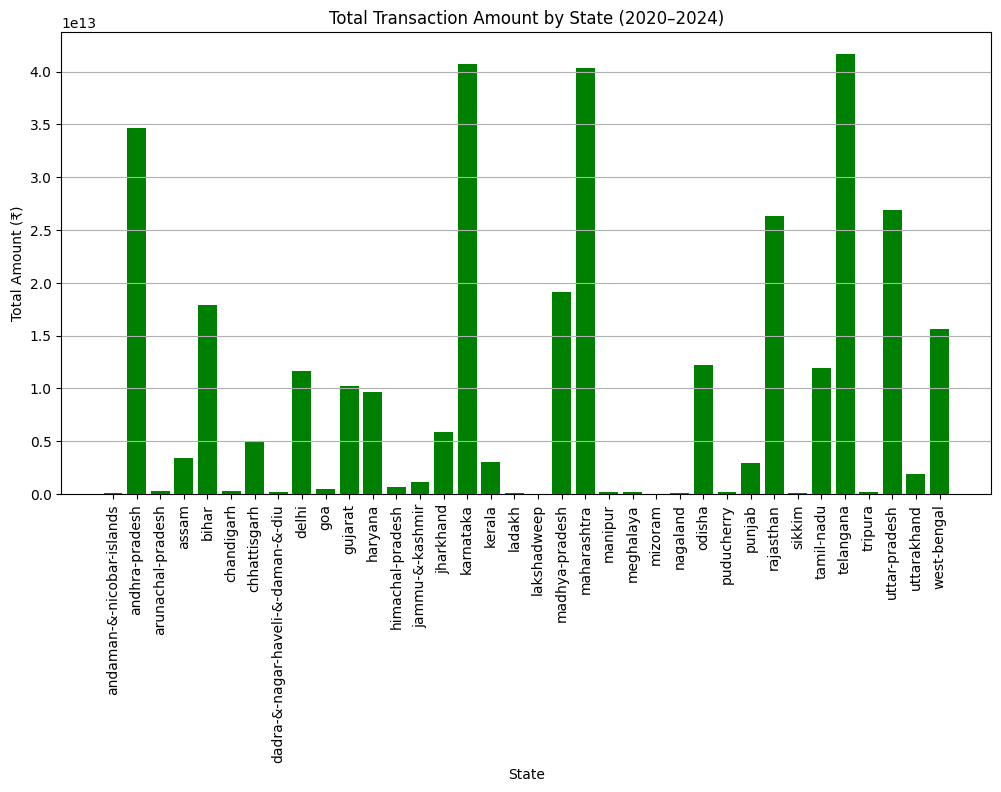

In [14]:
# Highest Total Transactions
state_amount = df2.groupby('state')['amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(state_amount['state'], state_amount['amount'], color='green')
plt.xticks(rotation=90)
plt.title("Total Transaction Amount by State (2020–2024)")
plt.xlabel("State")
plt.ylabel("Total Amount (₹)")
plt.grid(axis='y')
plt.show()

From above two graph we can see:
* Telangana has the highest Transactional Amount.
* Its wasn't high in the insurance purchase but high in transactions.
* AP has raised to the highest also.
* this reveals people of Telugana & AP spent less on Insurance.
* Maharashtra & Karnataka has maintained their position as the highest.
* Kerala is down bottom in Transactions but held a good position in Insurance.

# **Map**

## **Country**

### **Load CSV**

In [15]:
df3 = pd.read_csv("dataset/transaction/map_transaction_country.csv")
df3

,year,state,count,amount
0,2018,puducherry,104212,1.658260e+08
1,2018,tamil nadu,6726622,1.126156e+10
2,2018,uttar pradesh,12537805,1.393997e+10
3,2018,madhya pradesh,8025395,8.681603e+09
4,2018,andhra pradesh,9039585,1.199628e+10
...,...,...,...,...
1003,2024,jammu & kashmir,126261217,1.609510e+11
1004,2024,goa,46131536,5.656259e+10
1005,2024,arunachal pradesh,26793457,3.507989e+10
1006,2024,delhi,910543082,1.057060e+12


### **Dataset Info**

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1008 non-null   int64  
 1   state   1008 non-null   object 
 2   count   1008 non-null   int64  
 3   amount  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


### **Dataset Describe**

In [17]:
df3.describe()

,year,count,amount
count,1008.000000,1.008000e+03,1.008000e+03
mean,2021.000000,2.334169e+08,3.427801e+11
std,2.000993,5.143721e+08,7.030288e+11
min,2018.000000,7.780000e+02,1.928611e+06
25%,2019.000000,2.072062e+06,4.434177e+09
50%,2021.000000,1.799364e+07,2.951822e+10
75%,2023.000000,1.775121e+08,2.812155e+11
max,2024.000000,3.634232e+09,4.151820e+12


### **Plots**

In [18]:
# Highest State of Each Year
idx = df3.groupby('year')['amount'].idxmax()
top_states = df3.loc[idx].reset_index(drop=True)
top_states

,year,state,count,amount
0,2018,maharashtra,46090223,7.951894e+10
1,2019,karnataka,237796252,2.950471e+11
2,2020,telangana,343643787,6.963504e+11
3,2021,maharashtra,1010731502,1.475358e+12
4,2022,telangana,1819506832,2.978253e+12
5,2023,karnataka,2564434164,3.241376e+12
6,2024,karnataka,3455056424,4.151820e+12


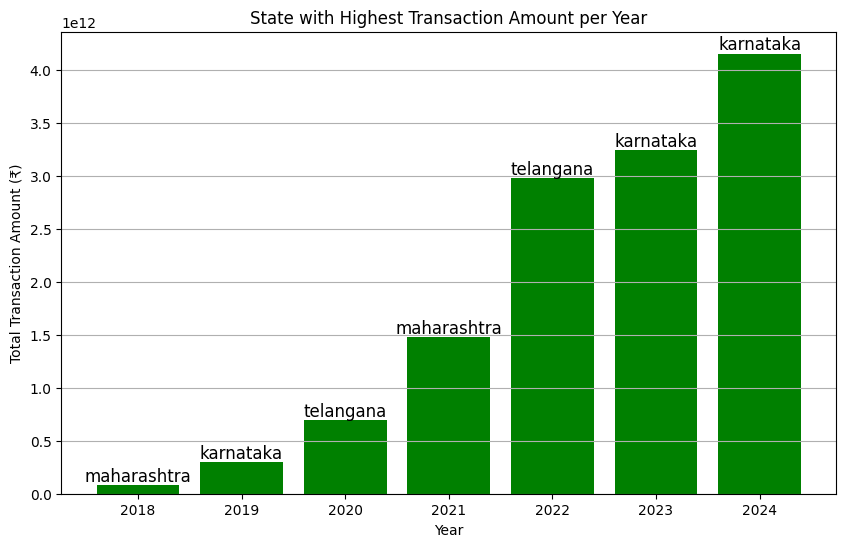

In [19]:
plt.figure(figsize=(10,6))
plt.bar(top_states['year'].astype(str), top_states['amount'], color='green')

for i,(state, amount) in enumerate(zip(top_states['state'], top_states['amount'])):
    plt.text(i, amount, state, ha='center', va='bottom', fontsize=12)

plt.title("State with Highest Transaction Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount (₹)")
plt.grid(axis='y')
plt.show()

* Maharashtra was leading at the start of 2018.
* Telangana made an appearance in 2020 & 2022.
* Karnataka overtook all from 2023 onwards.

In [20]:
# Highest State of Count Each Year
idx = df3.groupby('year')['count'].idxmax()
top_states = df3.loc[idx].reset_index(drop=True)
top_states

,year,state,count,amount
0,2018,west bengal,53705416,4.184393e+10
1,2019,karnataka,237796252,2.950471e+11
2,2020,karnataka,431536984,6.580367e+11
3,2021,maharashtra,1010731502,1.475358e+12
4,2022,telangana,1819506832,2.978253e+12
5,2023,maharashtra,2572162725,3.098015e+12
6,2024,maharashtra,3634231839,4.151028e+12


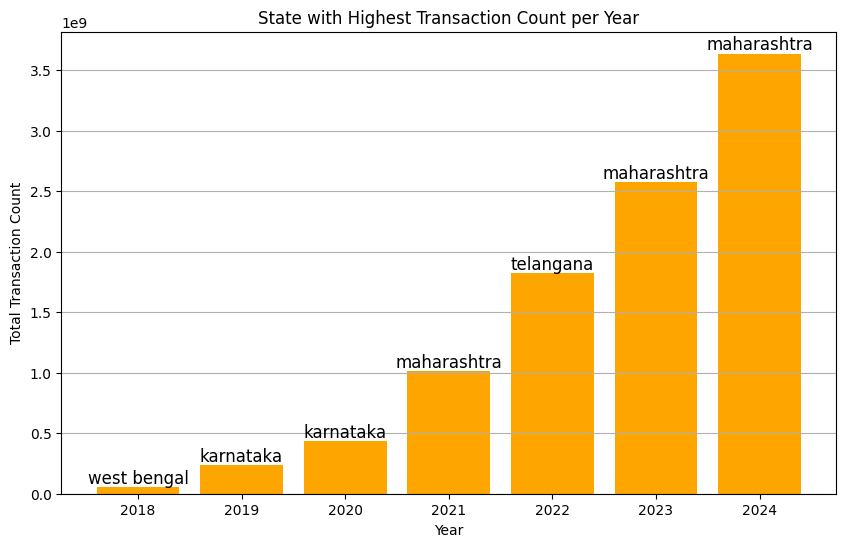

In [21]:
plt.figure(figsize=(10,6))
plt.bar(top_states['year'].astype(str), top_states['count'], color='orange')

for i, (state, count) in enumerate(zip(top_states['state'], top_states['count'])):
    plt.text(i, count, state, ha='center', va='bottom', fontsize=12)

plt.title("State with Highest Transaction Count per Year")
plt.xlabel("Year")
plt.ylabel("Total Transaction Count")
plt.grid(axis='y')
plt.show()

* Maharashtra has the highest count record but lost to Karnataka in terms of amount in 2024.
* West Bengal showed an appearance in count in 2018 but didn't reach the amount mark.
* Telangana's Peak was 2022.

## **State**

### **Load CSV**

In [22]:
df4 = pd.read_csv("dataset/transaction/map_transaction_state.csv")
df4

,year,district,count,amount,state
0,2018,north and middle andaman district,442,9.316631e+05,andaman-&-nicobar-islands
1,2018,south andaman district,5688,1.256025e+07,andaman-&-nicobar-islands
2,2018,nicobars district,528,1.139849e+06,andaman-&-nicobar-islands
3,2018,north and middle andaman district,825,1.317863e+06,andaman-&-nicobar-islands
4,2018,south andaman district,9395,2.394824e+07,andaman-&-nicobar-islands
...,...,...,...,...,...
20599,2024,alipurduar district,15875637,2.099251e+10,west-bengal
20600,2024,paschim bardhaman district,56616799,6.968735e+10,west-bengal
20601,2024,nadia district,65274337,1.079320e+11,west-bengal
20602,2024,birbhum district,36905213,5.778701e+10,west-bengal


### **Dataset Info**

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20604 entries, 0 to 20603
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      20604 non-null  int64  
 1   district  20604 non-null  object 
 2   count     20604 non-null  int64  
 3   amount    20604 non-null  float64
 4   state     20604 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 805.0+ KB


### **Dataset Describe**

In [24]:
df4.describe()

,year,count,amount
count,20604.000000,2.060400e+04,2.060400e+04
mean,2021.016890,1.141935e+07,1.676967e+10
std,2.006519,4.534570e+07,5.655640e+10
min,2018.000000,2.000000e+00,1.698886e+02
25%,2019.000000,2.521455e+05,4.578292e+08
50%,2021.000000,1.558070e+06,2.868918e+09
75%,2023.000000,8.122777e+06,1.352423e+10
max,2024.000000,1.674348e+09,1.790144e+12


### **Plots**

In [25]:
# Highest District on Transaction 
idx = df4.groupby('year')['amount'].idxmax()
top_districts = df4.loc[idx].reset_index(drop=True)
top_districts

,year,district,count,amount,state
0,2018,bengaluru urban district,33061353,5.027917e+10,karnataka
1,2019,bengaluru urban district,180458808,1.999667e+11,karnataka
2,2020,bengaluru urban district,267720411,3.525367e+11,karnataka
3,2021,bengaluru urban district,584958847,7.559260e+11,karnataka
4,2022,hyderabad district,1133829812,1.753799e+12,telangana
5,2023,bengaluru urban district,1345789742,1.497515e+12,karnataka
6,2024,bengaluru urban district,1674347983,1.790144e+12,karnataka


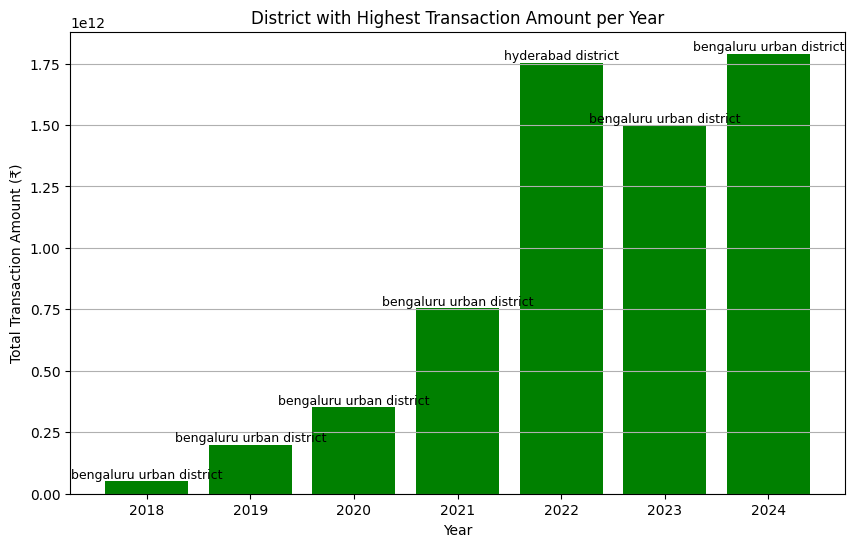

In [26]:
plt.figure(figsize=(10,6))
plt.bar(top_districts['year'].astype(str), top_districts['amount'], color='green')

for i, (district, amount) in enumerate(zip(top_districts['district'], top_districts['amount'])):
    plt.text(i, amount, district, ha='center', va='bottom', fontsize=9)

plt.title("District with Highest Transaction Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount (₹)")
plt.grid(axis='y')
plt.show()

* The Bengaluru urban district has held the largest amounts since 2018.
* Hyderabad district took the lead in 2022 on amounts. 
* That lead was equivalent to the 2024 lead of the Bengaluru urban district.
* 2022 was Hyderabad district's peak

In [27]:
# Highest District on Counts
idx = df4.groupby('year')['count'].idxmax()
top_districts_count = df4.loc[idx].reset_index(drop=True)
top_districts_count

,year,district,count,amount,state
0,2018,bengaluru urban district,33061353,5.027917e+10,karnataka
1,2019,bengaluru urban district,180458808,1.999667e+11,karnataka
2,2020,bengaluru urban district,267720411,3.525367e+11,karnataka
3,2021,bengaluru urban district,584958847,7.559260e+11,karnataka
4,2022,hyderabad district,1133829812,1.753799e+12,telangana
5,2023,bengaluru urban district,1345789742,1.497515e+12,karnataka
6,2024,bengaluru urban district,1674347983,1.790144e+12,karnataka


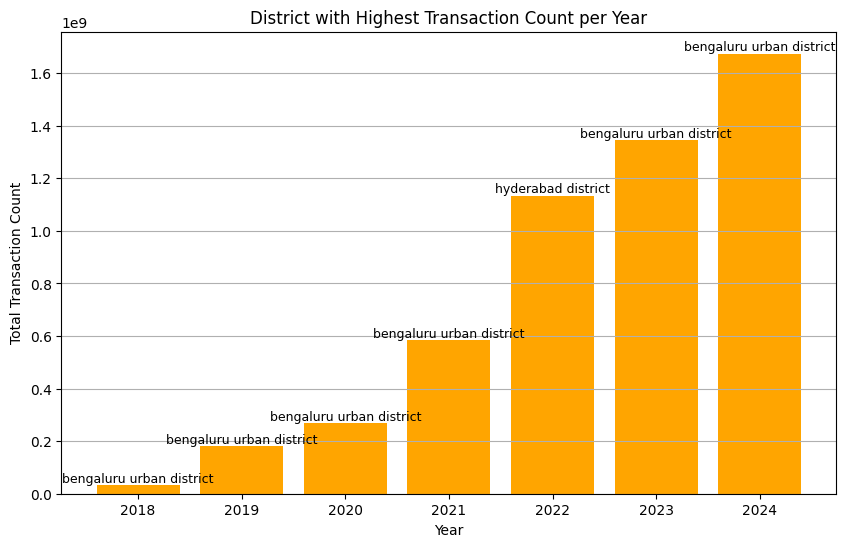

In [28]:
plt.figure(figsize=(10,6))
plt.bar(top_districts_count['year'].astype(str), top_districts_count['count'], color='orange')

for i, (district, count) in enumerate(zip(top_districts_count['district'], top_districts_count['count'])):
    plt.text(i, count, district, ha='center', va='bottom', fontsize=9)

plt.title("District with Highest Transaction Count per Year")
plt.xlabel("Year")
plt.ylabel("Total Transaction Count")
plt.grid(axis='y')
plt.show()

* Bengaluru urban district also held the largest count since 2018.
* Only lost once in 2022 to the Hyderabad district.
* The following year it took back its position on top.

# **Top**

## **Country**

### **Load CSV**

In [29]:
df5 = pd.read_csv("dataset/transaction/top_transaction_country.csv")
df5

,year,entity,count,amount,level
0,2018,maharashtra,16387034,2.171161e+10,state
1,2018,uttar pradesh,12537805,1.393997e+10,state
2,2018,karnataka,12016899,1.921790e+10,state
3,2018,west bengal,11710225,1.062598e+10,state
4,2018,andhra pradesh,9039585,1.199628e+10,state
...,...,...,...,...,...
835,2024,452001,58325781,5.278964e+10,pincode
836,2024,410501,55813356,4.227178e+10,pincode
837,2024,411057,48685493,3.854635e+10,pincode
838,2024,560037,48507070,5.037068e+10,pincode


### **Dataset Info**

In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    840 non-null    int64  
 1   entity  840 non-null    object 
 2   count   840 non-null    int64  
 3   amount  840 non-null    float64
 4   level   840 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.9+ KB


### **Dataset Describe**

In [31]:
df5.describe()

,year,count,amount
count,840.000000,8.400000e+02,8.400000e+02
mean,2021.000000,3.162794e+08,4.501920e+11
std,2.001192,5.544004e+08,7.484767e+11
min,2018.000000,6.901960e+05,6.717799e+08
25%,2019.000000,2.747039e+07,3.853085e+10
50%,2021.000000,7.973464e+07,1.322274e+11
75%,2023.000000,3.017213e+08,4.854627e+11
max,2024.000000,3.634232e+09,4.151820e+12


In [32]:
df5[df5['level']=='state']['entity'].value_counts()

entity
maharashtra       28
uttar pradesh     28
karnataka         28
andhra pradesh    28
madhya pradesh    28
telangana         28
rajasthan         26
west bengal       20
delhi             20
bihar             17
tamil nadu        15
odisha            14
Name: count, dtype: int64

In [33]:
df5[df5['level']=='district']['entity'].value_counts()

entity
bengaluru urban               28
pune                          28
jaipur                        28
hyderabad                     28
rangareddy                    25
medchal malkajgiri            21
central delhi                 17
visakhapatnam                 15
khordha                       13
bhopal                         9
mumbai suburban                8
gautam buddha nagar            8
gurugram                       8
kolkata                        6
thane                          6
chennai                        5
indore                         4
new delhi                      4
patna                          4
mumbai                         3
birbhum                        3
north twenty four parganas     2
chhindwara                     2
gautambuddha nagar             2
bankura                        1
lucknow                        1
ahmadabad                      1
Name: count, dtype: int64

In [34]:
df5[df5['level']=='pincode']['entity'].value_counts()

entity
560001    18
110006    17
600003    16
201301    13
700009    12
751001    12
800001    11
411004    10
302016    10
500001    10
560068     9
500012     8
462008     8
500081     8
500072     8
560037     8
400008     7
560078     6
560076     6
500032     6
560100     6
411057     6
410501     5
444510     4
302001     4
411006     4
411001     4
731101     4
110011     4
400070     4
800015     3
751002     3
110001     3
462001     2
411033     2
302012     2
500034     2
226004     2
560066     2
480001     2
560027     2
700039     2
452001     2
221001     1
380001     1
560043     1
Name: count, dtype: int64

### **Plots**

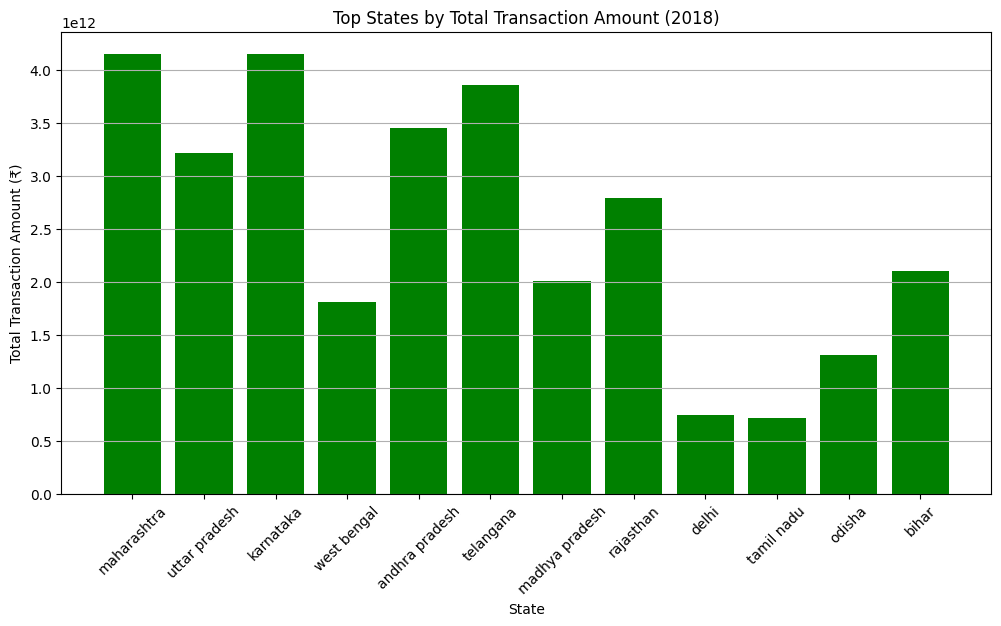

In [35]:
# filter for states
states = df5[df5['level'] == 'state']

plt.figure(figsize=(12,6))
plt.bar(states['entity'], states['amount'], color='green')
plt.xticks(rotation=45)
plt.title("Top States by Total Transaction Amount (2018)")
plt.xlabel("State")
plt.ylabel("Total Transaction Amount (₹)")
plt.grid(axis='y')
plt.show()

* Maharashtra & Karnataka are on top and on the same level.
* Telangana is right below them.
* AP & UP are on the rise.
* Delhi & Tamil Nadu seem to be last.

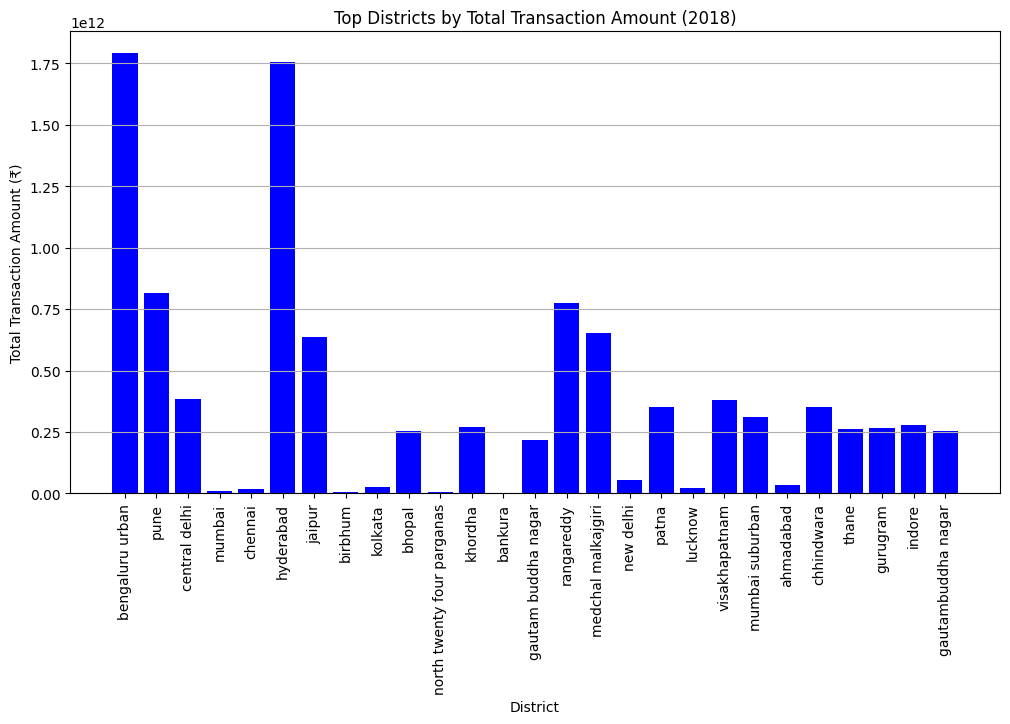

In [36]:
districts = df5[df5['level'] == 'district']

plt.figure(figsize=(12,6))
plt.bar(districts['entity'], districts['amount'], color='blue')
plt.xticks(rotation=90)
plt.title("Top Districts by Total Transaction Amount (2018)")
plt.xlabel("District")
plt.ylabel("Total Transaction Amount (₹)")
plt.grid(axis='y')
plt.show()

* On the district level, Bengaluru Urban & Hyderabad are nearly on the same level.
* The rest are below their half level.

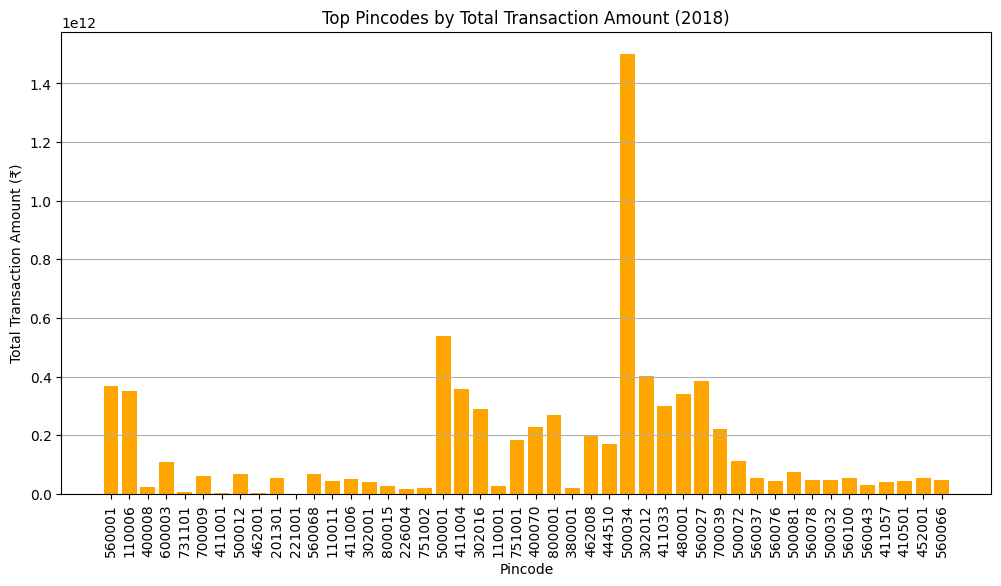

In [37]:
pincodes = df5[df5['level'] == 'pincode']

plt.figure(figsize=(12,6))
plt.bar(pincodes['entity'].astype(str), pincodes['amount'], color='orange')
plt.xticks(rotation=90)
plt.title("Top Pincodes by Total Transaction Amount (2018)")
plt.xlabel("Pincode")
plt.ylabel("Total Transaction Amount (₹)")
plt.grid(axis='y')
plt.show()

* The pincode `500034` has a huge lead in transactions compared to others.
* The second-best pincode `500001`, couldn’t even reach half of the first pincode.

## **State**

### **Load CSV**

In [38]:
df6 = pd.read_csv("dataset/transaction/top_transaction_state.csv")
df6

,year,state,entity,count,amount,level
0,2018,andaman-&-nicobar-islands,south andaman,5688,1.256025e+07,district
1,2018,andaman-&-nicobar-islands,nicobars,528,1.139849e+06,district
2,2018,andaman-&-nicobar-islands,north and middle andaman,442,9.316631e+05,district
3,2018,andaman-&-nicobar-islands,744101,1622,2.769298e+06,pincode
4,2018,andaman-&-nicobar-islands,744103,1223,2.238042e+06,pincode
...,...,...,...,...,...,...
18290,2024,west-bengal,711101,6753348,1.049483e+10,pincode
18291,2024,west-bengal,700059,6662715,8.009476e+09,pincode
18292,2024,west-bengal,700039,6575693,9.018748e+09,pincode
18293,2024,west-bengal,734001,6432082,8.996529e+09,pincode


### **Dataset Info**

In [39]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18295 entries, 0 to 18294
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18295 non-null  int64  
 1   state   18295 non-null  object 
 2   entity  18293 non-null  object 
 3   count   18295 non-null  int64  
 4   amount  18295 non-null  float64
 5   level   18295 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 857.7+ KB


### **Dataset Describe**

In [40]:
df6.describe()

,year,count,amount
count,18295.000000,1.829500e+04,1.829500e+04
mean,2021.002132,1.197467e+07,1.690444e+10
std,2.000805,4.962090e+07,6.277009e+10
min,2018.000000,2.000000e+00,6.025276e+01
25%,2019.000000,1.222215e+05,2.372684e+08
50%,2021.000000,9.845220e+05,1.538457e+09
75%,2023.000000,6.708908e+06,1.033093e+10
max,2024.000000,1.674348e+09,1.790144e+12
